# Part 5-1: review machine learning¶


1. *Why do we use Derivative / Gredient to fit a target function?*


ans: 

2. *In the words 'Gredient Descent', what's the Gredient and what's the Descent?*

ans: “Gredient”损失函数在某点切线的斜率，根据其值的正负判断函数的增减性，从而调整参数的变化方向。“Descent”给定一定的学习随着参数的变化使拟合函数得到一个最优解

3. *What's the advantages of the 3rd gradient descent method compared to the previous methods?*

ans: 第一种方式 随机产生k，b的值完全没有反向，最后loss的最小值完全靠随机；第二种方式 根据k，和b的变化定义四个方向，选择loss减小的方向变化k，b直至不能减小，随机获取其他三个方向中的一个；第三种梯度下降方式相比于前两种，第一是可以精准的控制loss值减小时k，b的变化方向，

4. *Using the simple words to describe: What's the machine leanring.*

ans: 数据和数学理论驱动的算法

# Part 5: Answer following questions:



1. *Why do we need dynamic programming? What's the difference of dynamic programming and previous talked search problme?*



ans: 在常规的搜索中通常会出现许多重复的子问题，过多的子问题会打提高算法的时间复杂度

2. *Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the right answer based on inputs?*

ans: 机器学习需要大量的数据以及算法的优化，有些问题利用动态规划可以很快速完美的解决。就例如上一节课的路径搜索如果用机器学习的方法我们可能需要考虑选择应用什么样的模型、选取大量的数据以及特征、还要进行调参等等最后的结果也可能是不尽如人意。但是用广度优先可以很好的解决这个问题，再利用动态规划优化即简单有能够拥有比较好的结果

3. *Can you catch up at least 3 problems which could solved by Dynamic Programming?*


ans: 最短路径

4. *Can you catch up at least 3 problems wich could sloved by Edit Distance?*


ans: 单词纠错、文本相似度、

5. *Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature.*


ans: 1. 存在最优子问题，2.子问题重叠

6. *What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)*

 ans:

# edit distance

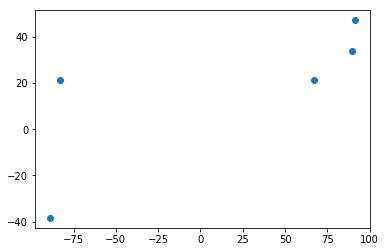

In [29]:
import random
import matplotlib.pyplot as plt
import math
import heapq
from collections import defaultdict

random.seed(2)
x = [random.random() * 200 - 100 for i in range(5)]
y = [random.random() * 200 - 100 for i in range(5)]
nodes = [i for i in range(5)]

def two_point_distance(i, j):
    return math.sqrt((x[i] - x[j]) ** 2 + (y[i] - y[j]) ** 2)

def get_graph(graph={}):
    for i in nodes:
        graph[i] = {j: two_point_distance(i, j) for j in nodes if j != i}
    return graph
            
plt.Figure()
plt.scatter(x, y)
plt.show()


In [30]:
graph = get_graph()
graph

{0: {1: 13.349208645327007,
  2: 199.2095404882623,
  3: 176.16247354601165,
  4: 35.33452666107855},
 1: {0: 13.349208645327007,
  2: 192.36666042973755,
  3: 173.06193860855296,
  4: 25.75090958792055},
 2: {0: 199.2095404882623,
  1: 192.36666042973755,
  3: 59.83025620388438,
  4: 166.84845472242247},
 3: {0: 176.16247354601165,
  1: 173.06193860855296,
  2: 59.83025620388438,
  4: 150.12547456855694},
 4: {0: 35.33452666107855,
  1: 25.75090958792055,
  2: 166.84845472242247,
  3: 150.12547456855694}}

In [35]:
def edit_distance(graph, s):
    closed = []
    pathes = [[s]]
    result = []
    while pathes:
        path = pathes.pop(0)
        current = path[-1]
        for node in graph[current].keys():
            if node in path: continue
            new_path = path + [node]
            if len(new_path) == len(graph.keys()):
                result.append(new_path)
            pathes.append(new_path)
    return result

In [36]:
edit_distance(graph, 0)

[[0, 1, 2, 3, 4],
 [0, 1, 2, 4, 3],
 [0, 1, 3, 2, 4],
 [0, 1, 3, 4, 2],
 [0, 1, 4, 2, 3],
 [0, 1, 4, 3, 2],
 [0, 2, 1, 3, 4],
 [0, 2, 1, 4, 3],
 [0, 2, 3, 1, 4],
 [0, 2, 3, 4, 1],
 [0, 2, 4, 1, 3],
 [0, 2, 4, 3, 1],
 [0, 3, 1, 2, 4],
 [0, 3, 1, 4, 2],
 [0, 3, 2, 1, 4],
 [0, 3, 2, 4, 1],
 [0, 3, 4, 1, 2],
 [0, 3, 4, 2, 1],
 [0, 4, 1, 2, 3],
 [0, 4, 1, 3, 2],
 [0, 4, 2, 1, 3],
 [0, 4, 2, 3, 1],
 [0, 4, 3, 1, 2],
 [0, 4, 3, 2, 1]]